In [775]:
import cv2
import sklearn
import sys
sys.executable
import glob
from scipy import ndimage, misc ,spatial 
import circle_fit as cf

img_list = []

for img in glob.glob("CCD-1/*.jpg"):
    img_list.append(cv2.imread(img,0))

In [870]:
def distance(v1, v2):
    #print(v1," ",v2)
    return np.sqrt(np.sum((v1 - v2) ** 2))  
def slope(v1, v2):
    #print(v1," ",v2)
    #print((v1[1]-v2[1]),end = ' ')
    #print(v2)
    return (v1[1]-v2[1])/(v2[0]-v1[0])

./Stop1_1000/10.jpg
1105.2539842507974 1097.0344325649526 758.1265665801259
1102.6844552472523 1095.6327237177888 641.2483310375021
1110.6512906971234 1091.9825837694107 642.3936120164275
Area:  1291201.0
(4329, 1, 2)
0
1
2


True

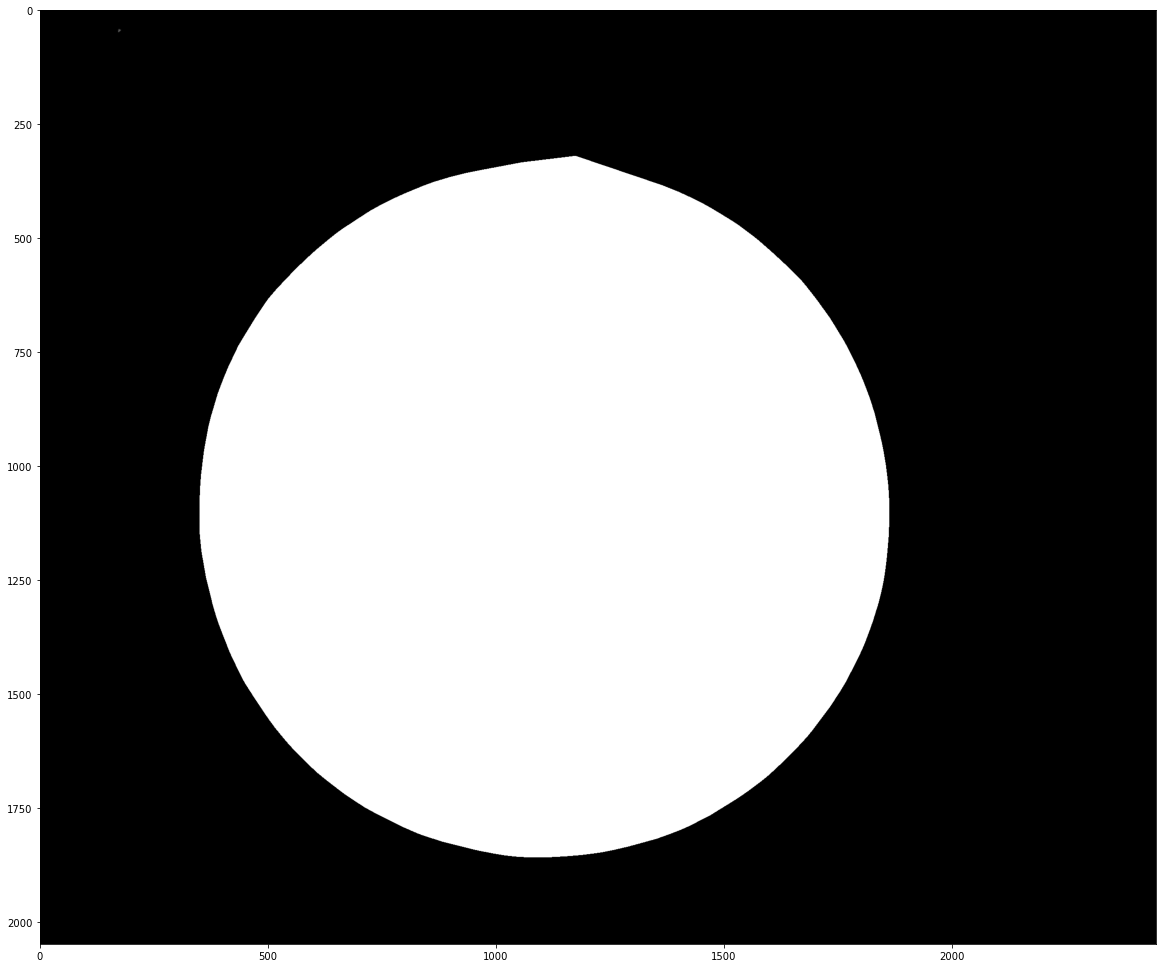

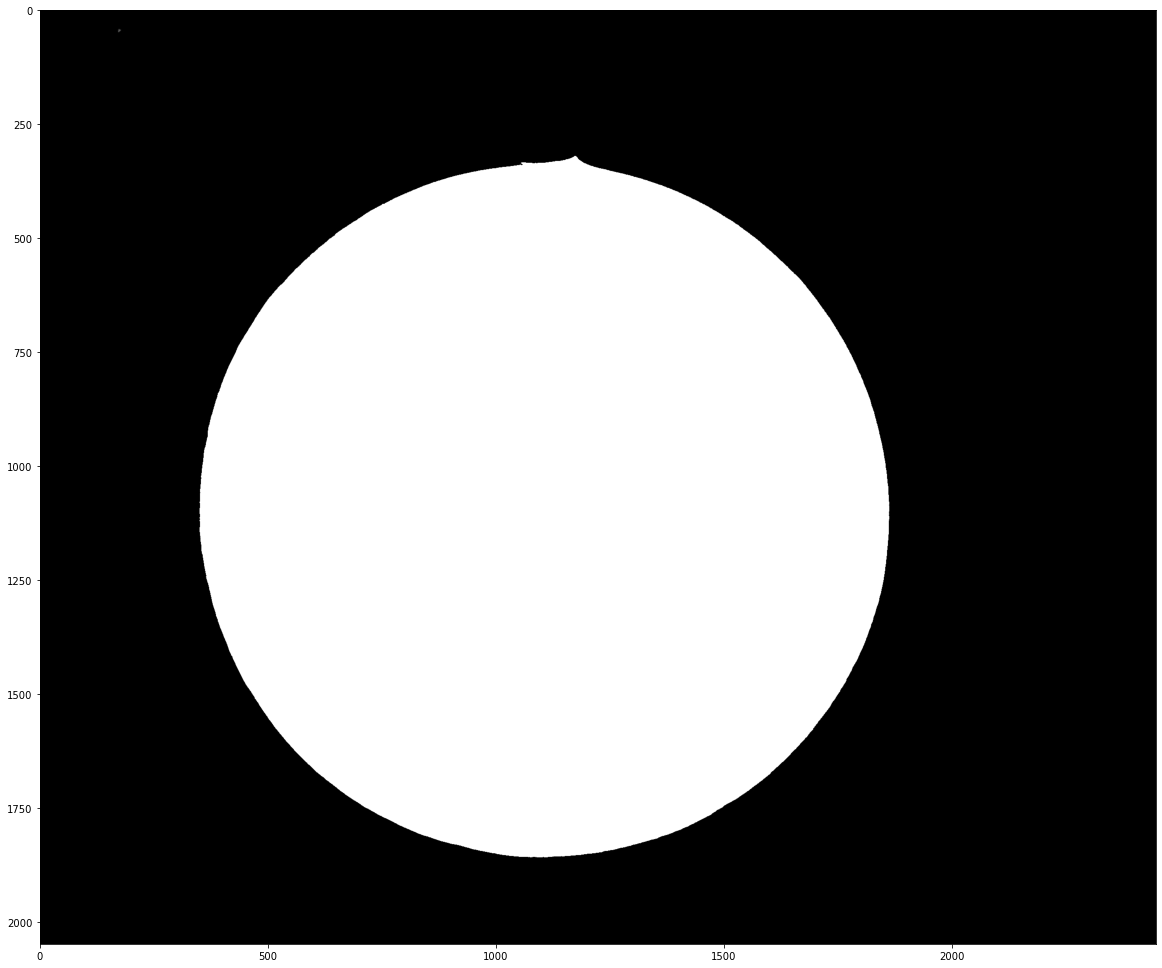

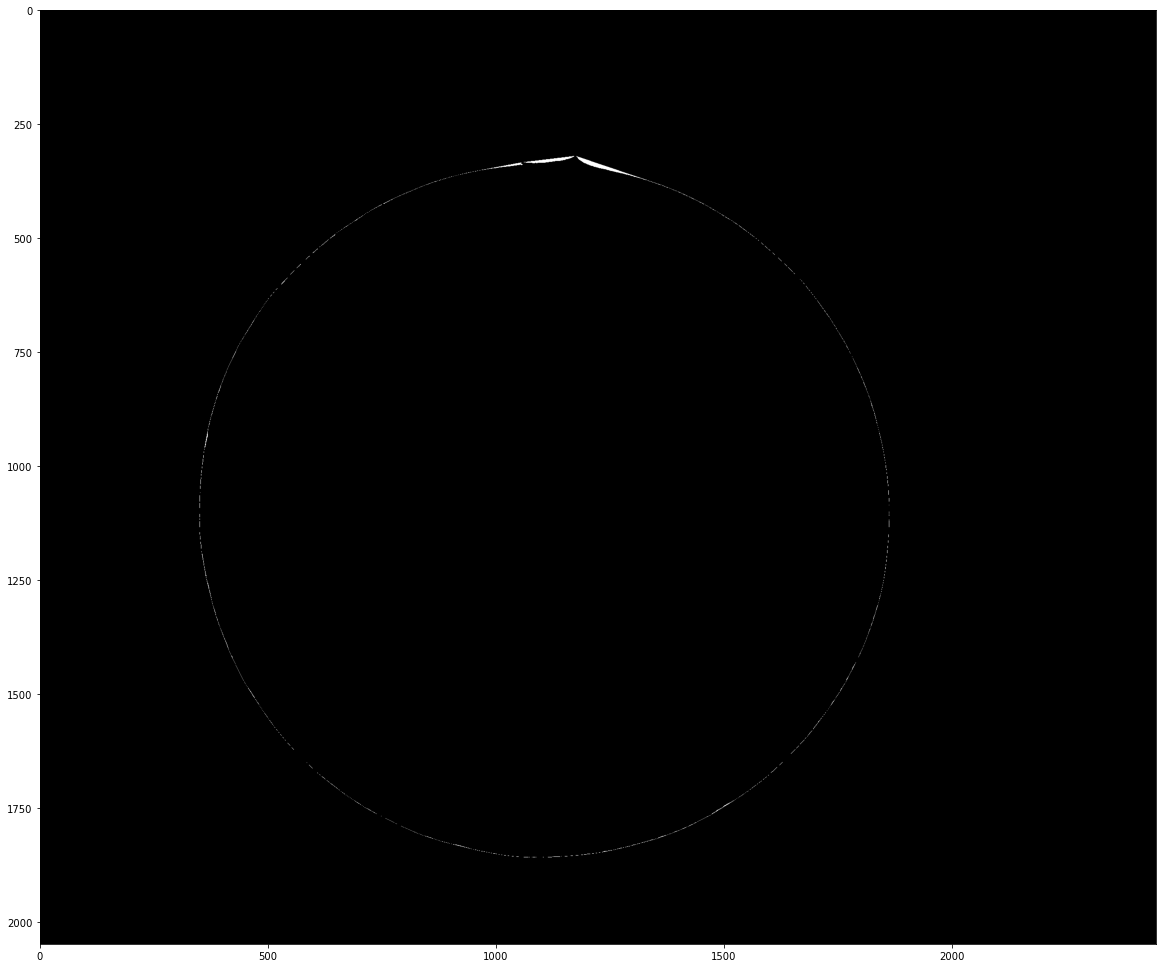

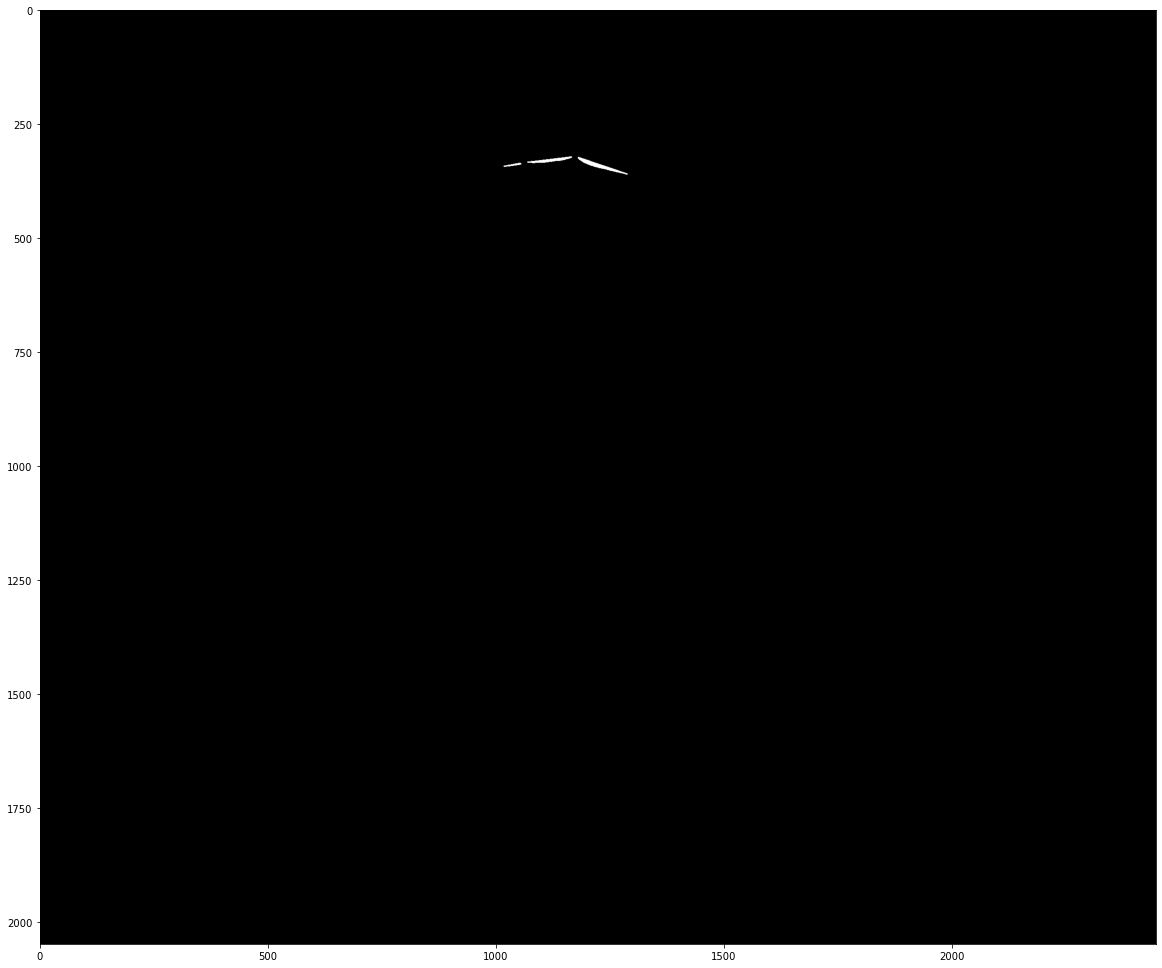

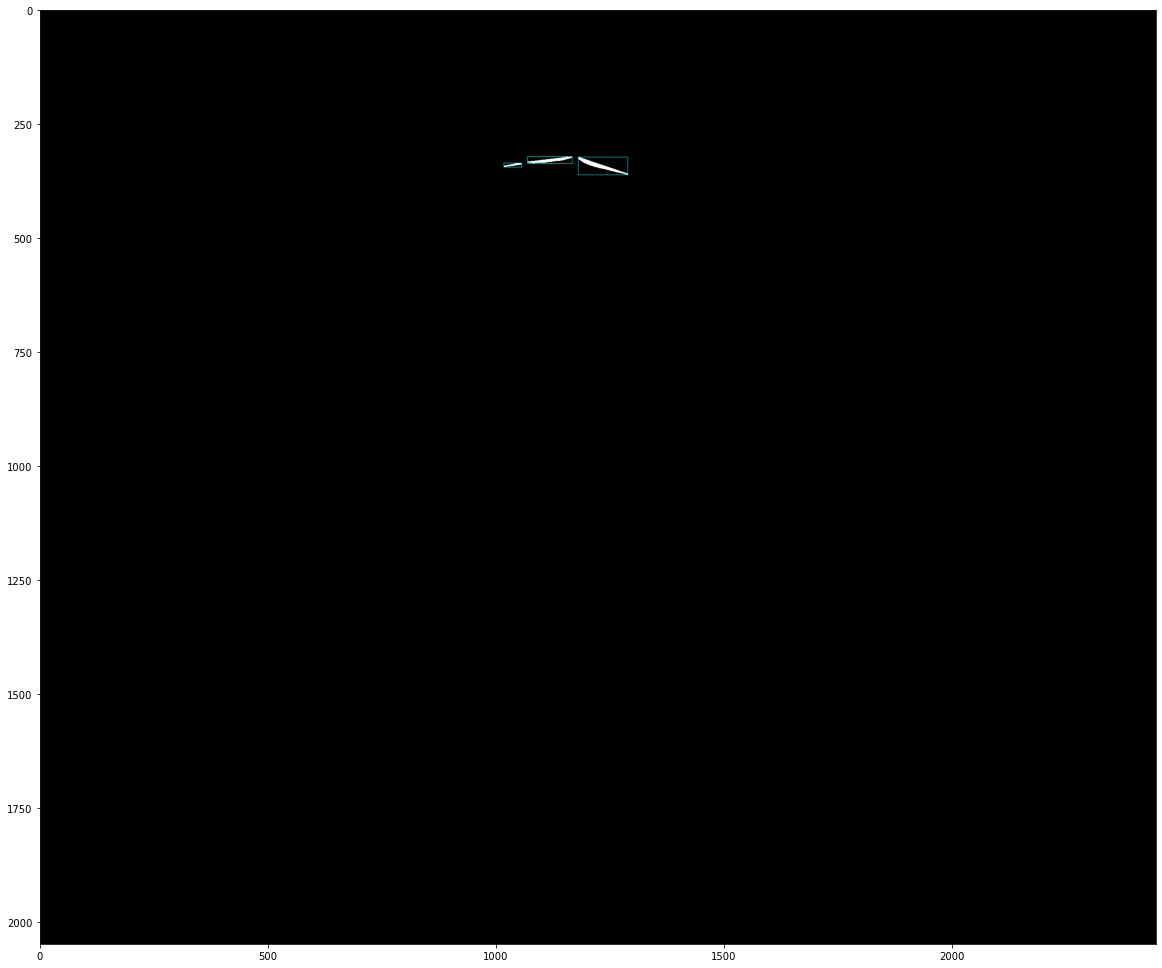

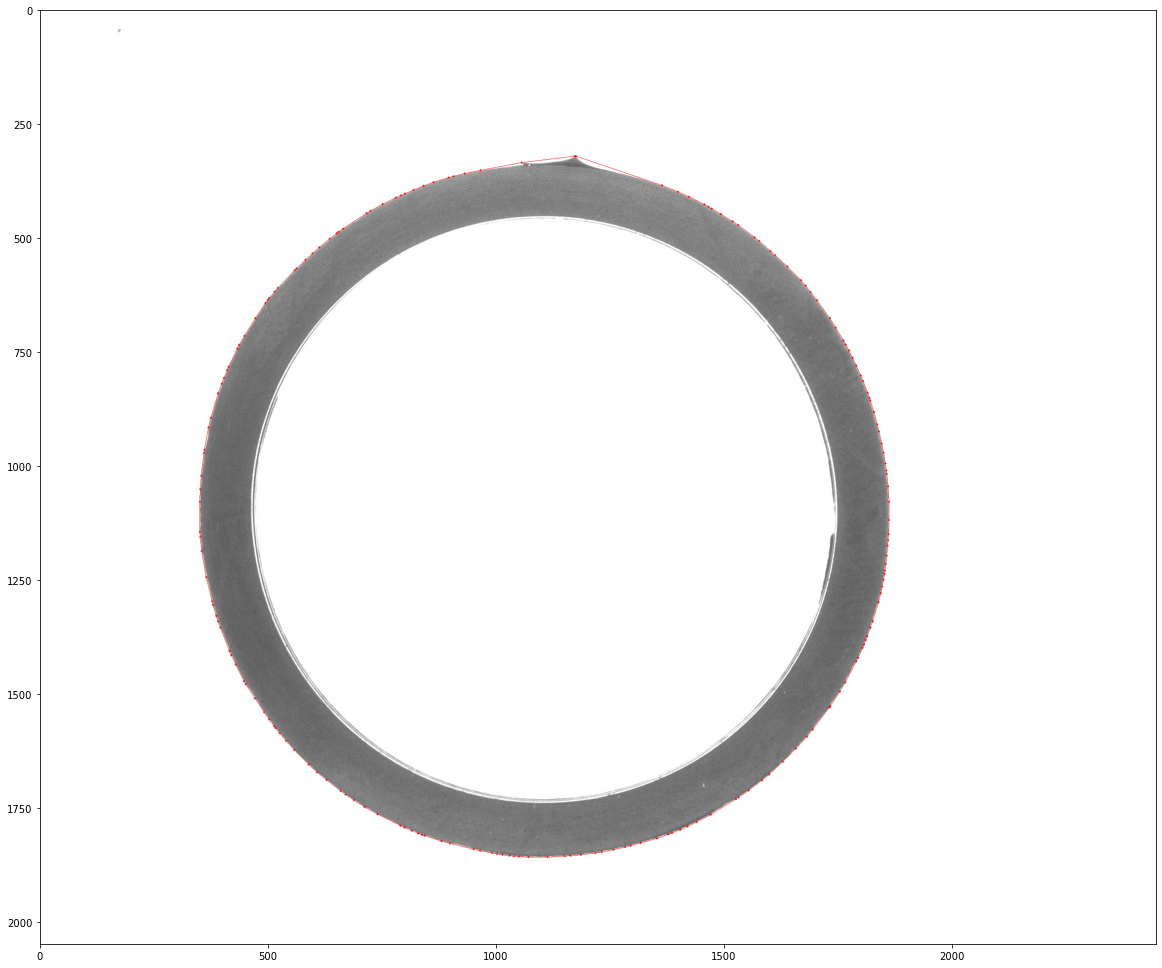

In [1106]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#replace========================
#filename = './CCD-1/NG (29).jpg'
filename = './Stop1_1000/10.jpg'
print(filename)
img_list[8] = np.array(cv2.imread(filename,0))
#print(img_list[8])
#========================
                       
gray = img_list[8]

ret, thresh1 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
#print(gray)

#print(thresh1)


_ , contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

backtorgb = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)


'''
for i in range(np.array(contours).shape[0]):
        if(np.array(contours[i]).shape[0]>1500):
            print(np.array(contours[i]).shape)
'''

import circle_fit as cf

circle_point = []
contours_final = []
for i in range(np.array(contours).shape[0]):
        if(np.array(contours[i]).shape[0]>1500 and cv2.contourArea(contours[i])<5000000):
            

            cor = np.array(contours[i])
            cor = cor.reshape(cor.shape[0],cor.shape[2])
            #print(cor.shape)

            xc,yc,r,_ = cf.least_squares_circle(cor)
            print(xc,yc,r)
            circle_point.append([xc,yc,r])
            contours_final.append(contours[i])
            #===========
            #cv2.circle(backtorgb,(1115, 1081), 640, (255, 0, 0), -1)
            #cv2.circle(backtorgb,(xc.astype(int), yc.astype(int)), r.astype(int), (255, 0, 0), 2)
            #=============
            

#for i in range(np.array(contours).shape[0]):
#    if(np.array(contours[i]).shape[0]>1500 and cv2.contourArea(contours[i])<5000000):

#cv2.drawContours(backtorgb,contours_final[0],-1,(0,0,255),3)
print("Area: ",cv2.contourArea(contours_final[1]))
epsilon = 0.5# * cv2.arcLength(contours[i],True)
approx = cv2.approxPolyDP(contours_final[0], epsilon, True)
#corner_map = np.zeros_like(gray)
#cv2.polylines(corner_map, [approx], True, (255, 255, 255), 2)
#print(approx.shape)
#================================================
hull = cv2.convexHull(contours_final[0])
cv2.drawContours(backtorgb, hull,-1,(255,0,0),3)
for i in range(len(hull)):
    cv2.line(backtorgb, tuple(hull[i][0]), tuple(hull[(i+1)%len(hull)][0]), (255,0,0), 1)

convex_img = gray.copy()
cv2.drawContours(convex_img, [hull],-1,(0,0,0),-1)
convex_img = np.invert(convex_img)
plt.figure(figsize=(20,20))
plt.imshow(convex_img,cmap = 'gray')
#=================================================
#================================================
contour_img = gray.copy()
cv2.drawContours(contour_img, [contours_final[0]],-1,(0,0,0),-1)
print(contours_final[0].shape)
contour_img = np.invert(contour_img)
plt.figure(figsize=(20,20))
plt.imshow(contour_img,cmap = 'gray')
#=================================================
diff_img = convex_img - contour_img
plt.figure(figsize=(20,20))
plt.imshow(diff_img,cmap = 'gray')
#=================================================
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(diff_img, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(20,20))
plt.imshow(opening,cmap = 'gray')
#=================================================
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(opening)


closing_backtorgb = cv2.cvtColor(opening,cv2.COLOR_GRAY2RGB)

for i in range(len(stats)):
    cv2.rectangle(closing_backtorgb, (stats[i][0], stats[i][1]), (stats[i][0]+stats[i][2], stats[i][1]+stats[i][3]), (0, 255,255 ), 1)
        
plt.figure(figsize=(20,20))
plt.imshow(closing_backtorgb)
#=================================================
'''
print(gray.shape)
ret,thresh1 = cv2.threshold(gray,200,255,cv2.THRESH_BINARY_INV )

plt.figure(figsize=(20,20))
plt.imshow(thresh1,cmap = 'gray')

corners = cv2.goodFeaturesToTrack(thresh1, 40, 0.1, 5,useHarrisDetector  = True)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(backtorgb,(x,y), 10, (255,0,0),thickness = 5)

#cv2.circle(gray, (x, y), 3, 255, -1)
plt.figure(figsize=(20,20))
plt.imshow(backtorgb)
#================================================
delta = 1
dist, dist_prev = 0,0
slope_now, slope_prev = 0,0
print(approx.shape)
for i in range(delta,approx.shape[0],delta):
#for i in range(135+delta,approx.shape[0]-870,delta):
    pt1 = np.array([approx[i][0][0],approx[i][0][1]])
    pt2 = np.array([approx[i-delta][0][0],approx[i-delta][0][1]])
    circle_center = np.array([circle_point[0][0],circle_point[0][1]])
    
    cv2.circle(backtorgb, (pt1[0],pt1[1]), 3, (0,0,0),thickness = 3)
    
    #cv2.line(backtorgb, (approx[i][0][0],approx[i][0][1]), (int(circle_point[0][0]),int(circle_point[0][1])), (255,255,0),thickness = 5) 
    #dist_prev = np.linalg.norm(pt2-circle_center)
    dist = np.linalg.norm(pt1-circle_center)

    slope_prev = slope_now
    slope_now = slope(pt1,pt2)
    #print(slope_now)
    if(np.sign(slope_now) != np.sign(slope_prev)):
    #if(abs(dist-dist_prev)>3 and dist> circle_point[0][2]):
        cv2.circle(backtorgb, (approx[i][0][0],approx[i][0][1]), 10, (255,255,0),thickness = 5)
        #print(dist-dist_prev)
            
        
        #dist = cv2.pointPolygonTest(contours[i],(50,50),True)
        #print(dist)
        #hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in contours[i]]
        #print(np.array(hulls[0]))
        #cv2.polylines(backtorgb, contours[i], 1, (255, 0, 0))
        #print(i)


#cv2.imshow("img", gray)
#cv2.waitKey(0)

plt.figure(figsize=(20,20))
plt.imshow(backtorgb)

'''

cor = np.array(contours[1])
cor = cor.reshape(cor.shape[0],cor.shape[2])
#print(cor.shape)

xc,yc,r,_ = cf.least_squares_circle(cor)
#print(xc,yc,r)

for i in range(len(circle_point)):
    print(i)
    #cv2.circle(backtorgb,(circle_point[i][0].astype(int), circle_point[i][1].astype(int)), circle_point[i][2].astype(int), (255, 0, 0), 2)
    
#=============

plt.figure(figsize=(20,20))
plt.imshow(backtorgb)
cv2.imwrite('contour.jpg',backtorgb)


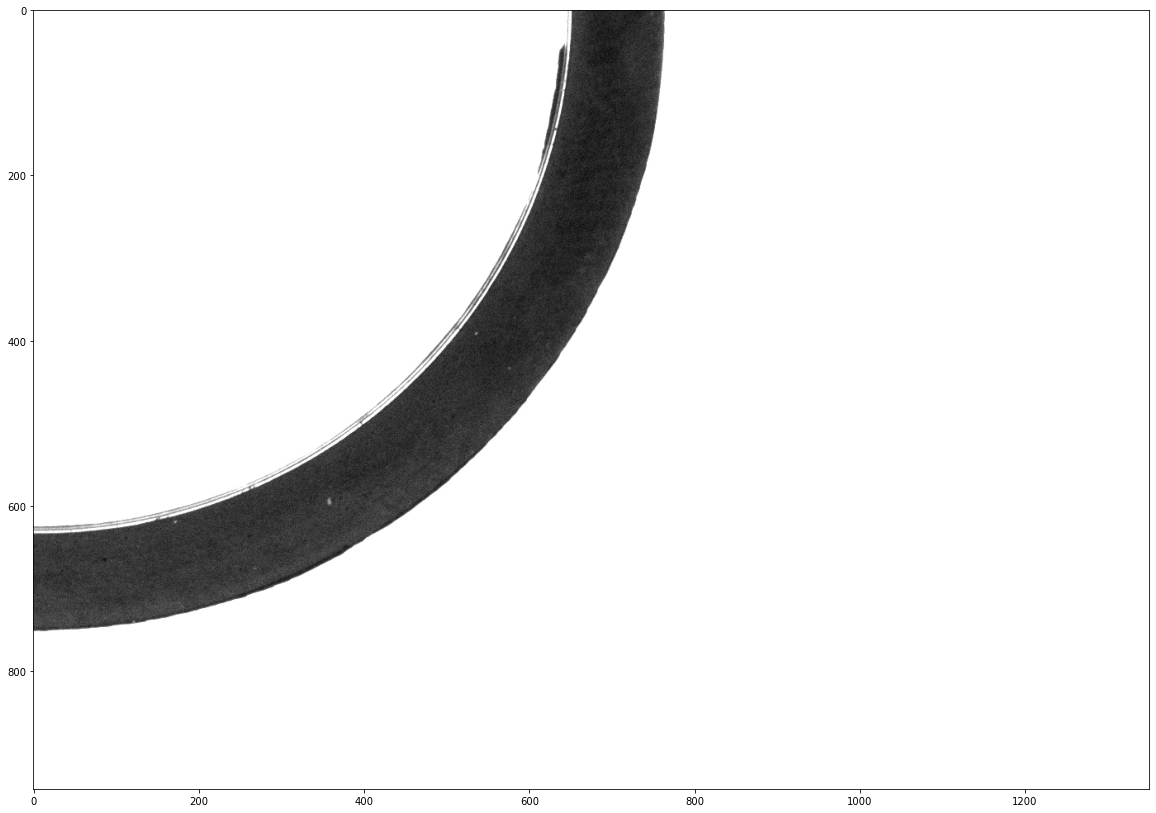

In [1054]:
img_temp = img_list[8][int(xc):,int(yc):]
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center < (radius+10)
    return mask

h = img_temp.shape[0]
w = img_temp.shape[1]
center = (circle_point[i][0].astype(int), circle_point[i][1].astype(int))
radius = circle_point[i][2].astype(int)
mask = create_circular_mask(h, w, center=center, radius=radius)
plt.figure(figsize=(20,20))
plt.imshow(img_temp,cmap = 'gray')

In [1055]:
mask_array = np.ma.masked_array(img_temp, mask=mask,fill_value = 255)
img_temp = mask_array.filled()

1105.7427082211173 1092.3443831441004 759.653584753961
1107.796767721839 1093.6002560524132 644.5298118473597


"\nimg_temp = cv2.blur(img_temp,(10,10))\nsift = cv2.xfeatures2d.SIFT_create()\nkp = sift.detect(img_temp,None)\nimg=cv2.drawKeypoints(img_temp,kp,img_temp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)\nplt.figure(figsize=(20,20))\nplt.imshow(img,cmap = 'gray')\n"

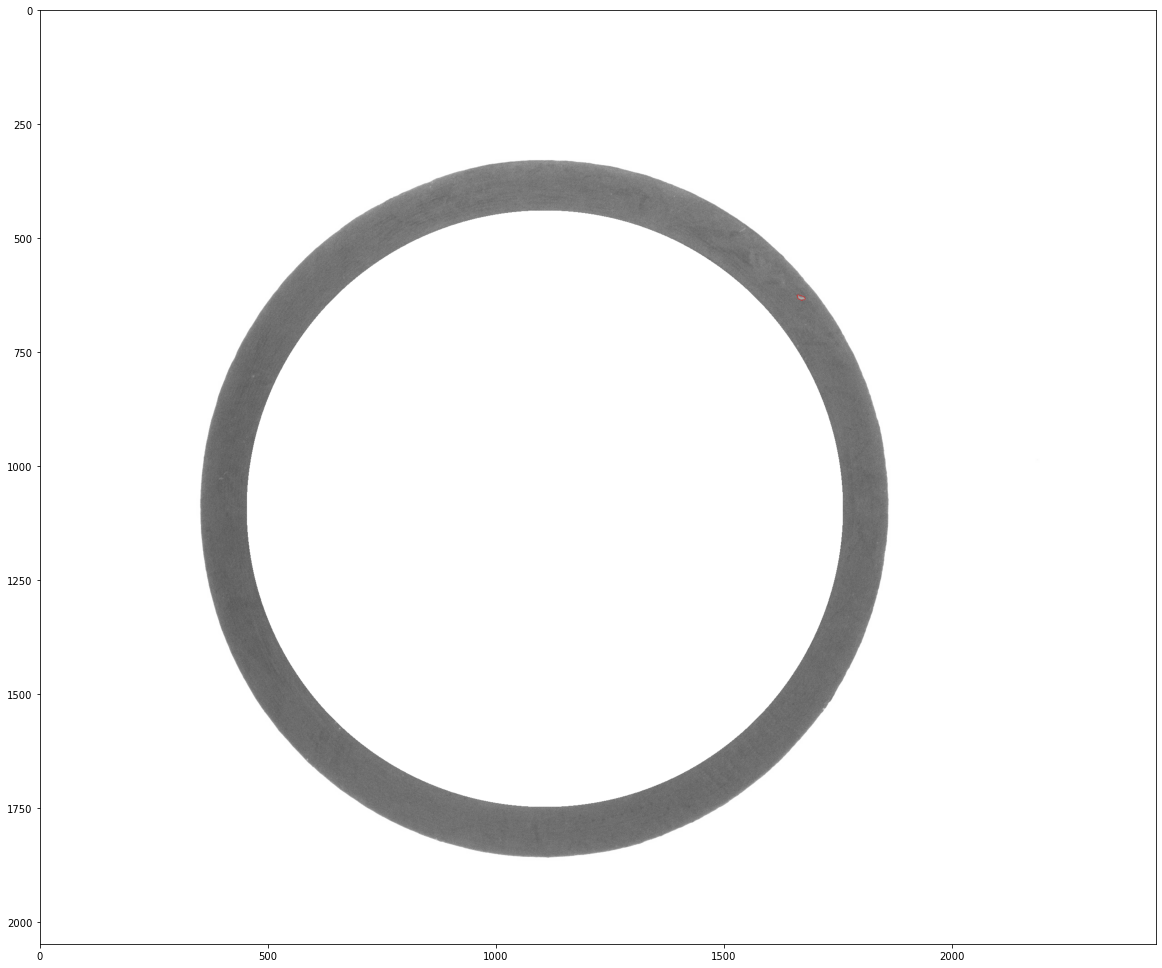

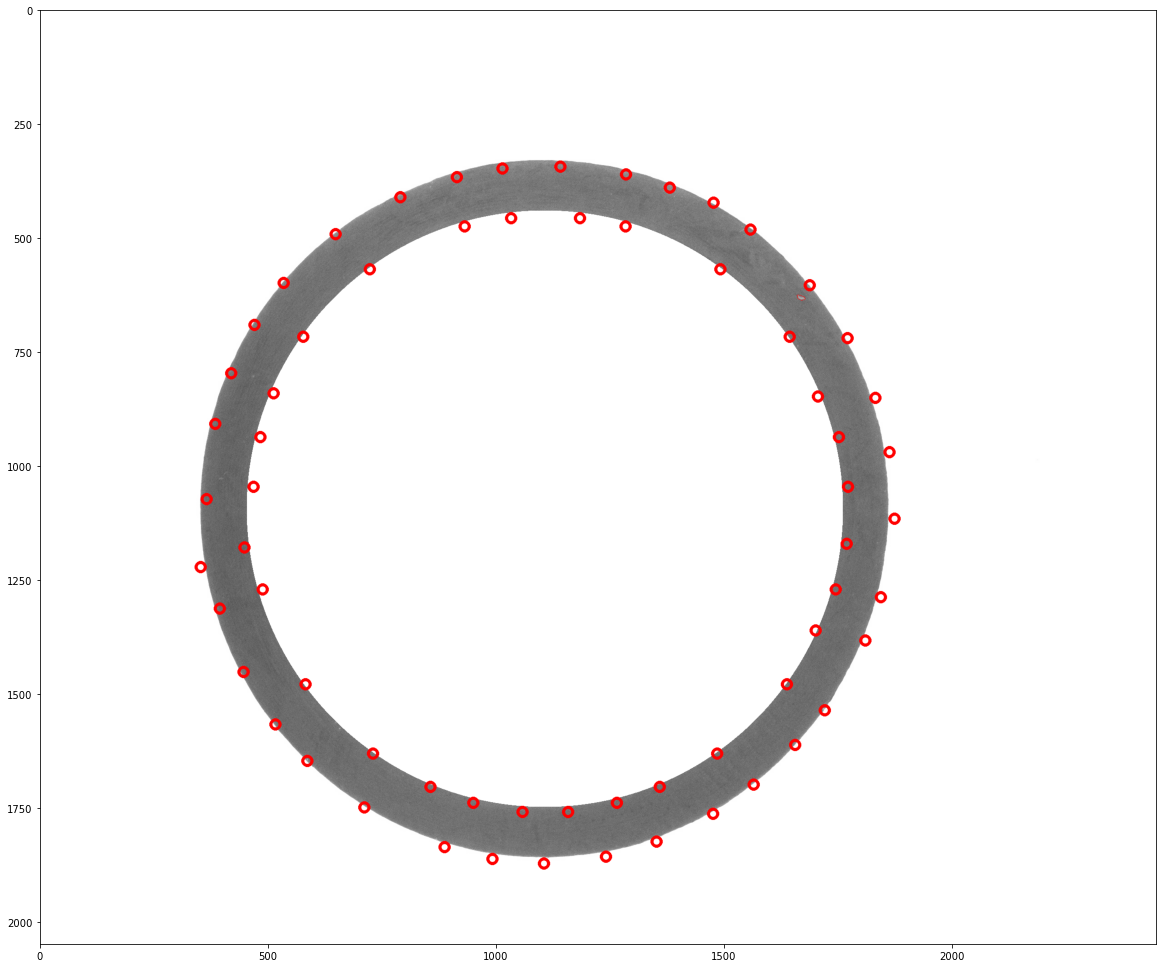

In [1038]:
img_temp = img_list[8]


img_temp.shape
img_temp = mask_innercicle(img_temp)
#plt.figure(figsize=(20,20))
#plt.imshow(img_temp,cmap = 'gray')

#cv2.imwrite('1.jpg',img_temp)
#img_temp = cv2.blur(img_temp,(5,5))

#plt.figure(figsize=(20,20))
#plt.imshow(img_temp,cmap = 'gray')

#img_temp = cv2.blur(img_temp,(3,3))

#plt.figure(figsize=(20,20))
#plt.imshow(img_temp,cmap = 'gray')
#img_temp = ndimage.minimum_filter(img_temp, size=5)
#plt.figure(figsize=(20,20))
#plt.imshow(img_temp,cmap = 'gray')
#plt.figure(figsize=(20,20))
#plt.imshow(img_temp,cmap = 'gray')

#img_temp = cv2.blur(img_temp,(3,3))

#clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(20,20))#cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5,5))
#clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(3,3))

#img_temp = clahe.apply(img_temp)

#img_temp = cv2.blur(img_temp,(3,3))


#img_temp = img_temp - blur
vis = img_temp.copy()
#mser = cv2.MSER_create(_delta=5, _min_area=150,_max_variation=0.7)

#mser = cv2.MSER_create(_delta=5, _min_area=250,_max_variation=0.5)


mser = cv2.MSER_create(_delta=5, _min_area=120, _max_area = 800, _max_variation=1.2)
#mser = cv2.MSER_create(_delta=5, _min_area=800,_max_variation=0.9)
#mser = cv2.MSER_create(_delta=5, _min_area=800,_max_variation=0.5)
#cv2.MSER_create(_delta=3, _min_area=100,_max_variation=0.3)
#mser = cv2.MSER_create(_delta=3, _min_area=100,_max_variation=0.5)
regions = mser.detectRegions(img_temp)


hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
#print(np.array(hulls[0]))
vis_rgb = cv2.cvtColor(vis,cv2.COLOR_GRAY2RGB)

cv2.polylines(vis_rgb, hulls, 1, (255, 0, 0))
#############find average intensity in poly####################
'''
print(np.array(hulls).shape)

mask = np.zeros_like(vis)
mask = cv2.fillPoly(mask, [hulls[0]],1)
mask_vis = vis*mask

mean_in_poly = np.average(vis,weights = mask)
min_in_poly = np.min(mask_vis[mask_vis>0])
max_in_poly = np.max(mask_vis[mask_vis>0])
std_in_poly = np.std(mask_vis[mask_vis>0])
print(mean_in_poly, " ",min_in_poly," ",max_in_poly," ",std_in_poly)
'''
##############################################################
#print(hulls)
#====================================
'''
plt.figure(figsize=(20,20))
plt.imshow(vis_rgb)

plt.figure(figsize=(20,20))
plt.imshow(mask_vis,cmap = 'gray')
'''
#====================================
'''
edged=cv2.Canny(img_temp,3,40)#3 33


plt.figure(figsize=(20,20))
plt.imshow(img_temp,cmap = 'gray')

plt.figure(figsize=(20,20))
plt.imshow(edged,cmap = 'gray')
#ret,thresh1 = cv2.threshold(block_img,100,255,cv2.THRESH_BINARY_INV)#THRESH_TOZERO_INV
kernel = np.ones((5,5),np.uint8)
#opening = cv2.morphologyEx(edged, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)




plt.figure(figsize=(20,20))
plt.imshow(closing,cmap = 'gray')
'''

ret,thresh1 = cv2.threshold(img_temp,200,255,cv2.THRESH_BINARY_INV )
corners = cv2.goodFeaturesToTrack(thresh1, 100, 0.3, minDistance = 100,blockSize=30)
corners = np.int0(corners)

plt.figure(figsize=(20,20))
plt.imshow(vis_rgb,cmap = 'gray')

for i in corners:
    x,y = i.ravel()
    cv2.circle(vis_rgb,(x,y), 10, (255,0,0),thickness = 5)

#cv2.circle(gray, (x, y), 3, 255, -1)

plt.figure(figsize=(20,20))
plt.imshow(vis_rgb)
'''
img_temp = cv2.blur(img_temp,(10,10))
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(img_temp,None)
img=cv2.drawKeypoints(img_temp,kp,img_temp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(20,20))
plt.imshow(img,cmap = 'gray')
'''
#119.73475609756098   91   171   12.95472774223646

In [1022]:
Not D
128.83333333333334   104   150   8.304951668867329

D

122.54545454545455   96   148   9.561987625681455

SyntaxError: invalid syntax (<ipython-input-1022-c438c3e28cdf>, line 1)

In [ ]:
cv2.__version__

In [ ]:
|